In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/cars.csv', index_col="Unnamed: 0")
df

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34
10,11,17


In [3]:
df.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


## High level API 1
- Data를 matrix형태로 줘야함
- 왜 그런지는 다중 선형회귀에서 이해할 수 있음

In [18]:
x = torch.FloatTensor(df[['speed']].values) # 특성 데이터
y = torch.FloatTensor(df[['dist']].values) # 라벨

In [19]:
linear = Linear(1,1) # (특성 데이터의 갯수, 라벨의 갯수)

In [20]:
list(linear.parameters()) # linear.parameters() 안에서 w와 b의 값이 주어짐 (Random하게)

[Parameter containing:
 tensor([[0.3909]], requires_grad=True),
 Parameter containing:
 tensor([-0.3984], requires_grad=True)]

In [34]:
linear.weight

Parameter containing:
tensor([[3.9324]], requires_grad=True)

In [35]:
linear.bias

Parameter containing:
tensor([-17.5791], requires_grad=True)

In [30]:
loss_fn = MSELoss()
optimizer = Adam(linear.parameters(), lr=0.1)
for step in range(1000):
    optimizer.zero_grad()
    hx = linear.forward(x) # hx = w*x+b # linear(x) <-- special 함수로 재정의 되어있어서 가능
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(step, cost.item())

0 227.6426544189453
1 229.89804077148438
2 227.6140594482422
3 228.3563995361328
4 229.01004028320312
5 228.3516387939453
6 227.6178741455078
7 227.60049438476562
8 228.0518035888672
9 228.2368621826172
10 227.96046447753906
11 227.5795440673828
12 227.4620361328125
13 227.63644409179688
14 227.82347106933594
15 227.79129028320312
16 227.58709716796875
17 227.4200439453125
18 227.4242401123047
19 227.53953552246094
20 227.60260009765625
21 227.5354461669922
22 227.40965270996094
23 227.34487915039062
24 227.37896728515625
25 227.4406280517578
26 227.44180297851562
27 227.37509155273438
28 227.30789184570312
29 227.29757690429688
30 227.33103942871094
31 227.34933471679688
32 227.32086181640625
33 227.2725067138672
34 227.24981689453125
35 227.26222229003906
36 227.2775421142578
37 227.26577758789062
38 227.2344970703125
39 227.21360778808594
40 227.21612548828125
41 227.22509765625
42 227.21875
43 227.19830322265625
44 227.18276977539062
45 227.1822509765625
46 227.1865234375
47 227.18

482 227.0704345703125
483 227.07040405273438
484 227.07040405273438
485 227.0704345703125
486 227.0704345703125
487 227.07040405273438
488 227.07040405273438
489 227.0704345703125
490 227.0704345703125
491 227.0704345703125
492 227.07040405273438
493 227.07040405273438
494 227.0704345703125
495 227.0704345703125
496 227.07040405273438
497 227.07040405273438
498 227.0704345703125
499 227.0704345703125
500 227.0704345703125
501 227.07040405273438
502 227.07040405273438
503 227.0704345703125
504 227.0704345703125
505 227.07040405273438
506 227.07040405273438
507 227.0704345703125
508 227.0704345703125
509 227.07040405273438
510 227.07040405273438
511 227.0704345703125
512 227.0704345703125
513 227.0704345703125
514 227.07040405273438
515 227.07040405273438
516 227.0704345703125
517 227.0704345703125
518 227.07040405273438
519 227.07040405273438
520 227.0704345703125
521 227.0704345703125
522 227.0704345703125
523 227.07040405273438
524 227.07040405273438
525 227.0704345703125
526 227.0704

In [37]:
list(linear.parameters())

[Parameter containing:
 tensor([[3.9324]], requires_grad=True),
 Parameter containing:
 tensor([-17.5791], requires_grad=True)]

In [38]:
linear.weight

Parameter containing:
tensor([[3.9324]], requires_grad=True)

In [39]:
linear.bias

Parameter containing:
tensor([-17.5791], requires_grad=True)

In [41]:
linear.forward(torch.FloatTensor([10]))

tensor([21.7450], grad_fn=<AddBackward0>)

In [42]:
linear(torch.FloatTensor([10]))

tensor([21.7450], grad_fn=<AddBackward0>)

In [44]:
pred = linear(x).detach().numpy()

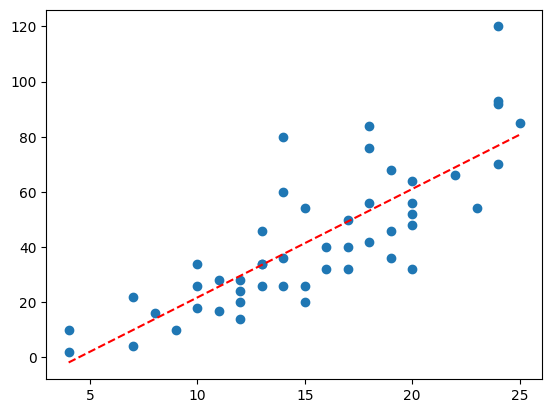

In [46]:
plt.scatter(df['speed'], df['dist'])
plt.plot(df['speed'], pred, 'r--')
plt.show()

### 번외 Python의 special 함수

In [31]:
class Test:
    def __init__(self):
        self.d = {}
        self.a = 10
    def __repr__(self):
        return f'a={self.a}'
    def __setitem__(self, key, value):
        print('setitem call')
        self.d[key] = value

In [32]:
obj = Test()
print(obj) # obj.__repr__()

a=10


In [33]:
obj['aa']=100 # obj.__setitem__('aa', 100)

setitem call


## High level API 2


In [48]:
model = Sequential()
model.add_module('nn1', Linear(1,1))

In [49]:
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [51]:
for step in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) # w*x+b # hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(step, cost.item())

0 228.79652404785156
1 228.78736877441406
2 228.77822875976562
3 228.76913452148438
4 228.76007080078125
5 228.7510986328125
6 228.7421417236328
7 228.73324584960938
8 228.72433471679688
9 228.71548461914062
10 228.70669555664062
11 228.69793701171875
12 228.68922424316406
13 228.6805419921875
14 228.6719207763672
15 228.66329956054688
16 228.65472412109375
17 228.64620971679688
18 228.63771057128906
19 228.62930297851562
20 228.62088012695312
21 228.61253356933594
22 228.60418701171875
23 228.5959014892578
24 228.58766174316406
25 228.57943725585938
26 228.5712890625
27 228.56314086914062
28 228.55503845214844
29 228.5469970703125
30 228.5389404296875
31 228.5309600830078
32 228.52301025390625
33 228.5150909423828
34 228.50723266601562
35 228.49937438964844
36 228.49160766601562
37 228.48382568359375
38 228.4761199951172
39 228.46839904785156
40 228.46072387695312
41 228.45314025878906
42 228.44554138183594
43 228.43800354003906
44 228.43048095703125
45 228.42300415039062
46 228.41554

546 227.11839294433594
547 227.11802673339844
548 227.11766052246094
549 227.1172637939453
550 227.11691284179688
551 227.11654663085938
552 227.1161651611328
553 227.11581420898438
554 227.1154327392578
555 227.11509704589844
556 227.11474609375
557 227.1143798828125
558 227.11404418945312
559 227.1136932373047
560 227.1133575439453
561 227.11300659179688
562 227.1126708984375
563 227.1123504638672
564 227.1120147705078
565 227.11167907714844
566 227.111328125
567 227.11102294921875
568 227.11070251464844
569 227.1103973388672
570 227.11007690429688
571 227.1097412109375
572 227.1094207763672
573 227.10914611816406
574 227.10879516601562
575 227.10848999023438
576 227.10818481445312
577 227.1078643798828
578 227.1076202392578
579 227.10728454589844
580 227.10694885253906
581 227.10670471191406
582 227.1063995361328
583 227.10610961914062
584 227.1058349609375
585 227.1055450439453
586 227.10525512695312
587 227.10498046875
588 227.1046905517578
589 227.1044158935547
590 227.1041564941

In [54]:
model[0].weight

Parameter containing:
tensor([[3.9274]], requires_grad=True)

In [55]:
model[0].bias

Parameter containing:
tensor([-17.4939], requires_grad=True)

In [57]:
model( torch.FloatTensor([10]))

tensor([21.7803], grad_fn=<AddBackward0>)